# Project - Building my own RDB

The goal of this project is to take a several datasets, clean and transform them and create a relational database through AWS and posgresql that is sufficient and useful for an intended end-user



## Part 1: Extract Data from public csv file in folder
Import pandas first.
Downloaded my 2 csv files using pd_read.csv
Import geopy.geocoders to get the location from the address

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

school = pd.read_csv("https://docs.google.com/spreadsheets/d/1nz9hOdBAh5taog78bCJcGcHCmt_e66wfAytT1p0ej50/gviz/tq?tqx=out:csv", dtype={'LOCATION_NAME': str,'LOCATION_CODE': str})
#pd.read_csv("...  /gviz/tq?tqx=out:csv")
tax = pd.read_csv("https://docs.google.com/spreadsheets/d/14KaEdwDNAHzwh-2hp_b76a8S8Cisse3PWP2QKt7e-D8/gviz/tq?tqx=out:csv")

In [2]:
school.dtypes
tax.dtypes
#We want a peek of what the datatypes are

FISCAL_YEAR                            int64
ATS SYSTEM CODE                       object
LOCATION_CODE                         object
LOCATION_NAME                         object
BEDS NUMBER                            int64
MANAGED_BY_NAME                       object
LOCATION_TYPE_DESCRIPTION             object
LOCATION_CATEGORY_DESCRIPTION         object
GRADES_TEXT                           object
GRADES_FINAL_TEXT                     object
OPEN_DATE                             object
STATUS_DESCRIPTIONS                   object
PRIMARY_BUILDING_CODE                 object
PRIMARY_ADDRESS_LINE_1                object
STATE_CODE                            object
X_COORDINATE                         float64
Y_COORDINATE                         float64
COMMUNITY_DISTRICT                     int64
COUNCIL_DISTRICT                       int64
CENSUS_TRACT                         float64
BOROUGH_BLOCK_LOT                      int64
NTA                                   object
NTA_NAME  

STATE                                     object
ZIPCODE                                    int64
Number of returns                          int64
Adjusted gross income (AGI)                int64
Avg AGI                                  float64
Number of returns with total income        int64
Total income amount                        int64
Avg total income                         float64
Number of returns with taxable income      int64
Taxable income amount                      int64
Avg taxable income                       float64
dtype: object

In [3]:
tax['Adjusted gross income (AGI)'] #checking to make sure a column is callable

0        105089761
1           255534
2           128387
3            58302
4           643708
           ...    
27785         8176
27786        87014
27787        62354
27788        21393
27789      2117021
Name: Adjusted gross income (AGI), Length: 27790, dtype: int64

In [48]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
import geopy and Nominatim

SyntaxError: invalid syntax (811248244.py, line 3)

## My Transform

I transformed my dataframes to utilize space, be easier to call, traverse and be aesthetically pleasing. This involved removing certain NAs, nulls, repeated values



In [5]:
tax.dtypes
#State is an object datatype, we have to remove. 
# It is also arbitrary, as we are only looking at schools in New York


STATE                                     object
ZIPCODE                                    int64
Number of returns                          int64
Adjusted gross income (AGI)                int64
Avg AGI                                  float64
Number of returns with total income        int64
Total income amount                        int64
Avg total income                         float64
Number of returns with taxable income      int64
Taxable income amount                      int64
Avg taxable income                       float64
dtype: object

In [6]:
tax
#It looks like theres a 0 at the beginning of every state zipcode. Their quantitative values seem to be off as well
#There are also some columns that do not need to be included in these groups
#In addition, some columns can be renamed due to all-capital text

,STATE,ZIPCODE,Number of returns,Adjusted gross income (AGI),Avg AGI,Number of returns with total income,Total income amount,Avg total income,Number of returns with taxable income,Taxable income amount,Avg taxable income
0,AL,0,2022380,105089761,51.963410,2022380,106420533,52.621433,1468370,67850874,46.208295
1,AL,35004,4930,255534,51.832454,4930,258024,52.337525,4020,163859,40.760945
2,AL,35005,3300,128387,38.905152,3300,129390,39.209091,2440,70760,29.000000
3,AL,35006,1230,58302,47.400000,1230,58585,47.630081,940,36341,38.660638
4,AL,35007,11990,643708,53.687073,11990,651350,54.324437,9280,414878,44.706681
...,...,...,...,...,...,...,...,...,...,...,...
27785,WY,83126,150,8176,54.506667,150,8319,55.460000,110,4543,41.300000
27786,WY,83127,1400,87014,62.152857,1400,88398,63.141429,1060,58258,54.960377
27787,WY,83128,860,62354,72.504651,860,63379,73.696512,680,45017,66.201471
27788,WY,83414,200,21393,106.965000,200,22319,111.595000,170,15853,93.252941


## Clean
In this cell, I am cleaning the data by running it through the basic methods of finding nulls, na's, and duplicates as well as making sure the datatype is acceptable

In [7]:
def cleaner(df_name, col):
  df_name[col] = df_name[col].isnull()
  df_name[col] = df_name[col].dropna()
  #df_name = df_name.fillna()
  df_name[col] = df_name[col].drop_duplicates()
  #if  df_name[col].dtype ==  object
    #df_name[col] = df_name[col].astype(int) #converts
  return df_name


In [8]:
total_tax = tax[tax['ZIPCODE'] == 0]
tax = tax.drop(tax[tax['ZIPCODE'] == 0].index)
total_tax

#Extract the total values of each state and drop the values from the main pd
total_income =  total_tax[total_tax['STATE'] == 'NY']['Total income amount']


,STATE,ZIPCODE,Number of returns,Adjusted gross income (AGI),Avg AGI,Number of returns with total income,Total income amount,Avg total income,Number of returns with taxable income,Taxable income amount,Avg taxable income
0,AL,0,2022380,105089761,51.963410,2022380,106420533,52.621433,1468370,67850874,46.208295
576,AK,0,355150,23033908,64.856844,355150,23381582,65.835793,298200,16989485,56.973457
631,AZ,0,2765040,158182203,57.207926,2765030,160378706,58.002519,2085770,104815664,50.252743
920,AR,0,1203050,62120570,51.635900,1203040,62885054,52.271790,872140,39934544,45.789144
1409,CA,0,16861400,1209190396,71.713523,16861370,1228344911,72.849650,12832810,812473081,63.312173
2893,CO,0,2460980,167306854,67.983833,2460970,170260516,69.184312,1975630,118354034,59.906984
3290,CT,0,1726510,155533337,90.085396,1726520,158221246,91.641710,1393360,114630059,82.268803
3554,DE,0,435110,26444434,60.776434,435110,26760898,61.503753,345010,18081165,52.407655
3611,DC,0,326630,27506754,84.213802,326620,28033281,85.828428,269080,20383800,75.753679
3635,FL,0,9130210,540735119,59.224828,9130210,548100943,60.031581,6668960,376539624,56.461521


In [9]:
tax_ny = tax[tax['STATE'] == 'NY']
tax_ny.head()

,STATE,ZIPCODE,Number of returns,Adjusted gross income (AGI),Avg AGI,Number of returns with total income,Total income amount,Avg total income,Number of returns with taxable income,Taxable income amount,Avg taxable income
15974,NY,10001,13720,2094642,152.670700,13720,2127995,155.101676,11230,1695611,150.989403
15975,NY,10002,43410,2002349,46.126446,43410,2033619,46.846786,25490,1347603,52.867909
15976,NY,10003,29340,6135126,209.104499,29340,6229147,212.309032,26080,4984488,191.123006
15977,NY,10004,2580,892142,345.791473,2580,904779,350.689535,2380,727900,305.840336
15978,NY,10005,5660,5343796,944.133569,5660,5371221,948.978975,5260,4332890,823.743346


In [10]:
tax_ny['Number of returns'] == tax_ny['Number of returns with total income']
#compare the columns 'Number of returns' and 'Number of returns with total income'
#They appear to be the same, so there is no use keeping duplicates. We can drop on of these columns
tax_ny['Number of returns']* tax_ny['Avg AGI']
tax_ny['Number of returns']* tax_ny['Avg total income']
tax_ny['Number of returns']* tax_ny['Avg taxable income']
#It appears that Adjusted Gross Income, Total income amount, Taxable income amount are not needed because we could find this value easily through a query using multiplication in a DB. That way the end-user could still reach these if desired

15974    True
15975    True
15976    True
15977    True
15978    True
         ... 
17510    True
17511    True
17512    True
17513    True
17514    True
Length: 1541, dtype: bool

15974    2.094642e+06
15975    2.002349e+06
15976    6.135126e+06
15977    8.921420e+05
15978    5.343796e+06
             ...     
17510    1.888690e+05
17511    2.085390e+05
17512    2.496940e+05
17513    2.750190e+05
17514    1.254449e+07
Length: 1541, dtype: float64

15974    2.127995e+06
15975    2.033619e+06
15976    6.229147e+06
15977    9.047790e+05
15978    5.371221e+06
             ...     
17510    1.906190e+05
17511    2.119820e+05
17512    2.518400e+05
17513    2.798250e+05
17514    1.272668e+07
Length: 1541, dtype: float64

15974    2.071575e+06
15975    2.294996e+06
15976    5.607549e+06
15977    7.890681e+05
15978    4.662387e+06
             ...     
17510    1.683032e+05
17511    1.792510e+05
17512    2.038110e+05
17513    2.483850e+05
17514    1.161240e+07
Length: 1541, dtype: float64

In [11]:
tax_ny_avg = tax_ny[['ZIPCODE','Number of returns','Avg AGI', 'Avg total income','Number of returns with taxable income', 'Avg taxable income']]
tax_ny_avg.columns = ['Zipcode', 'Number_Returns', 'Avg_AGI','Avg_Total_Income', 'Number_Returns_Taxable_Income', 'Avg_Taxable_Income']
#subset and rename the columns

In [12]:
tax_ny_avg #check
tax_ny_avg.shape
len(tax_ny_avg['Zipcode'].unique())
#Zip Code is a unique value, which means it can be a primary key
tax_ny_avg = tax_ny_avg.copy()
tax_ny_avg['Avg_AGI'] = tax_ny_avg['Avg_AGI'].round(0) * 1000
tax_ny_avg['Avg_Total_Income'] = tax_ny_avg['Avg_Total_Income'].round(0) * 1000

tax_ny_avg['Number_Returns_Taxable_Income'] = tax_ny_avg['Number_Returns_Taxable_Income'].round(0) *1000
tax_ny_avg['Avg_Taxable_Income'] = tax_ny_avg['Avg_Taxable_Income'].round(0) *1000




,Zipcode,Number_Returns,Avg_AGI,Avg_Total_Income,Number_Returns_Taxable_Income,Avg_Taxable_Income
15974,10001,13720,152.670700,155.101676,11230,150.989403
15975,10002,43410,46.126446,46.846786,25490,52.867909
15976,10003,29340,209.104499,212.309032,26080,191.123006
15977,10004,2580,345.791473,350.689535,2380,305.840336
15978,10005,5660,944.133569,948.978975,5260,823.743346
...,...,...,...,...,...,...
17510,14901,5420,34.846679,35.169557,3560,31.052247
17511,14903,3640,57.290934,58.236813,2880,49.244792
17512,14904,7180,34.776323,35.075209,5120,28.385938
17513,14905,4340,63.368433,64.475806,3390,57.231563


(1541, 6)

1541

#Finding which columns in school to filter out
Each school has it's unique BEDS number. This column is a good candiate for Primary Key
GRADES_TEXT and GRADES_FINAL_TEXT indicate what was already explained by LOCATION_CATEGORY_DESCRIPTION.
Because we already have the address and zip code, we should not need other columns pertaining to location.
STATE_CODE is redundant becuase they all are in the same state
All columns including information about the principal and FAX number do not seem relevant to the desired end-user, as it would be more efficient to get more updated contact information for the school through the institution's website
We can remove these columns for these reasons

In [13]:
school.isnull().sum()
school.isna().sum()
#It appears we have a considerable amount of NA and NULL values for this pd
#It may be best to drop the columns with several hundred NAs
school.head()
len(school['BEDS NUMBER'].unique()) # Each school has it's unique BEDS number. This column is a good candiate for Primary Key
#GRADES_TEXT and GRADES_FNAL_TEXT indicate what was already explained by LOCATION_CATEGORY_DESCRIPTION.
#Because we already have the address and the values in this column are not unique of to make this a primary key, we should not need other coluns pertaining to location
#STATE_CODE is redundant becuase they all are in the same state
#All columns including information about the principal and FAX number do not seem relevant to the desired end-user, as it would be more efficient to get contact information for the school through web search
#We can remove these columns for these reasons

FISCAL_YEAR                             0
ATS SYSTEM CODE                         0
LOCATION_CODE                           0
LOCATION_NAME                           0
BEDS NUMBER                             0
MANAGED_BY_NAME                         0
LOCATION_TYPE_DESCRIPTION               0
LOCATION_CATEGORY_DESCRIPTION           0
GRADES_TEXT                             0
GRADES_FINAL_TEXT                      17
OPEN_DATE                               0
STATUS_DESCRIPTIONS                     0
PRIMARY_BUILDING_CODE                   0
PRIMARY_ADDRESS_LINE_1                  0
STATE_CODE                              0
X_COORDINATE                            1
Y_COORDINATE                            1
COMMUNITY_DISTRICT                      0
COUNCIL_DISTRICT                        0
CENSUS_TRACT                            1
BOROUGH_BLOCK_LOT                       0
NTA                                     1
NTA_NAME                                1
PRINCIPAL_NAME                    

FISCAL_YEAR                             0
ATS SYSTEM CODE                         0
LOCATION_CODE                           0
LOCATION_NAME                           0
BEDS NUMBER                             0
MANAGED_BY_NAME                         0
LOCATION_TYPE_DESCRIPTION               0
LOCATION_CATEGORY_DESCRIPTION           0
GRADES_TEXT                             0
GRADES_FINAL_TEXT                      17
OPEN_DATE                               0
STATUS_DESCRIPTIONS                     0
PRIMARY_BUILDING_CODE                   0
PRIMARY_ADDRESS_LINE_1                  0
STATE_CODE                              0
X_COORDINATE                            1
Y_COORDINATE                            1
COMMUNITY_DISTRICT                      0
COUNCIL_DISTRICT                        0
CENSUS_TRACT                            1
BOROUGH_BLOCK_LOT                       0
NTA                                     1
NTA_NAME                                1
PRINCIPAL_NAME                    

,FISCAL_YEAR,ATS SYSTEM CODE,LOCATION_CODE,LOCATION_NAME,BEDS NUMBER,MANAGED_BY_NAME,LOCATION_TYPE_DESCRIPTION,LOCATION_CATEGORY_DESCRIPTION,GRADES_TEXT,GRADES_FINAL_TEXT,...,ADMINISTRATIVE_DISTRICT_NAME,COMMUNITY_SCHOOL_SUP_NAME,FIELD_SUPPORT_CENTER_NAME,FIELD_SUPPORT_CENTER_LEADER_NAME,SCHOOL_SUPPORT_TEAM_NAME,SCHOOL_SUPPORT_TEAM_LEADER_NAME,HIGHSCHOOL_NETWORK_LOCATION_CODE,HIGHSCHOOL_NETWORK_NAME,HIGHSCHOOL_NETWORK_SUPERINTENDENT,Location 1
0,2018,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"333 EAST 4 STREET\nMANHATTAN, NY 10009\n(40.72..."
1,2018,01M019,M019,P.S. 019 Asher Levy,310100010019,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"185 1 AVENUE\nMANHATTAN, NY 10003\n(40.730009,..."
2,2018,01M020,M020,P.S. 020 Anna Silver,310100010020,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"166 ESSEX STREET\nMANHATTAN, NY 10002\n(40.721..."
3,2018,01M034,M034,P.S. 034 Franklin D. Roosevelt,310100010034,DOE,General Academic,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE","PK,0K,01,02,03,04,05,06,07,08",...,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"730 EAST 12 STREET\nMANHATTAN, NY 10009\n(40.7..."
4,2018,01M063,M063,The STAR Academy - P.S.63,310100010063,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"121 EAST 3 STREET\nMANHATTAN, NY 10009\n(40.72..."


1823

In [ ]:
school_sub = school[['LOCATION_NAME','BEDS NUMBER','MANAGED_BY_NAME','LOCATION_CATEGORY_DESCRIPTION', 'PRIMARY_ADDRESS_LINE_1', 'CENSUS_TRACT','NTA_NAME', 'Location 1']]
school_sub.columns = ['School_Name','BEDS' ,'School_Type', 'Grade_Levels','Address', 'Census_Tract', 'Neighborhood','Zip']
school_sub.head()
school_sub.dtypes
school_sub['Zip'] = school_sub['Zip'].astype(str)
#Checked the dataframe and dropped any remaining NAs after subsetting the datafram
school_sub.shape
school_sub = school_sub.dropna()
school_sub.shape
#



,School_Name,BEDS,School_Type,Grade_Levels,Address,Census_Tract,Neighborhood,Zip
0,P.S. 015 Roberto Clemente,310100010015,DOE,Elementary,333 EAST 4 STREET,2601.0,Lower East Side,"333 EAST 4 STREET\nMANHATTAN, NY 10009\n(40.72..."
1,P.S. 019 Asher Levy,310100010019,DOE,Elementary,185 1 AVENUE,4000.0,East Village,"185 1 AVENUE\nMANHATTAN, NY 10003\n(40.730009,..."
2,P.S. 020 Anna Silver,310100010020,DOE,Elementary,166 ESSEX STREET,3001.0,Chinatown,"166 ESSEX STREET\nMANHATTAN, NY 10002\n(40.721..."
3,P.S. 034 Franklin D. Roosevelt,310100010034,DOE,K-8,730 EAST 12 STREET,2800.0,Lower East Side,"730 EAST 12 STREET\nMANHATTAN, NY 10009\n(40.7..."
4,The STAR Academy - P.S.63,310100010063,DOE,Elementary,121 EAST 3 STREET,3200.0,East Village,"121 EAST 3 STREET\nMANHATTAN, NY 10009\n(40.72..."


School_Name      object
BEDS              int64
School_Type      object
Grade_Levels     object
Address          object
Census_Tract    float64
Neighborhood     object
Zip              object
dtype: object

C:\Users\balla\AppData\Local\Temp\ipykernel_33488\3715165466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_sub['Zip'] = school_sub['Zip'].astype(str)


(1823, 8)

(1822, 8)

In [15]:
#We knew that the zip code was inside the last column, but we want it in a column by itself
zips = []

for index in range(len(school_sub)):
    chip = school_sub.iloc[index, 7].split()
    if (len(chip) >= 5):
      index_2 = (len(chip)-3)
      zips.append(chip[index_2])
# Traversed through each row, extracted and assigned the zip values to a separate list called zips
#Replaced the last column with the zips list
school_sub['Zip'] = zips
school_sub.dtypes
school_sub['School_Name'] = school_sub['School_Name'].astype(str)
school_sub['School_Type'] = school_sub['School_Type'].astype(str)
school_sub['Grade_Levels'] = school_sub['Grade_Levels'].astype(str)
school_sub['Address'] = school_sub['Address'].astype(str)
school_sub['Neighborhood'] = school_sub['Neighborhood'].astype(str)
school_sub['Zip'] = school_sub['Zip'].astype(int)
#Made sure to confirm that each column had the correct datatype
school_sub.dtypes

School_Name      object
BEDS              int64
School_Type      object
Grade_Levels     object
Address          object
Census_Tract    float64
Neighborhood     object
Zip              object
dtype: object

School_Name      object
BEDS              int64
School_Type      object
Grade_Levels     object
Address          object
Census_Tract    float64
Neighborhood     object
Zip               int32
dtype: object

In [16]:
tax_ny_avg['Zip_id'] = pd.factorize(tax_ny_avg['Zipcode'])[0]
#created an id to be used as the primary key for my zip

tax_ny_df = tax_ny_avg[['Zipcode', 'Avg_AGI', 'Avg_Total_Income', 'Zip_id']]
tax_ny_df['Zip_id'] = tax_ny_df['Zip_id'].astype(str)
#creation of tax_ny_df by subsetting the tax_ny_avg pd
tax_ny_avg['Avg_AGI'] = tax_ny_avg['Avg_AGI'].astype(int)
returns_df = tax_ny_avg[[ 'Zip_id', 'Number_Returns', 'Number_Returns_Taxable_Income']].astype(str)
temp = returns_df['Zip_id'].astype(str)#create a temporary column to be added to school_df

school_df = school_sub[['BEDS', 'School_Name', 'School_Type', 'Grade_Levels', "Address", 'Neighborhood']] #, 'Zip'
school_df = school_df[:1541]
#match the rows and reset index to avoid creation of NaN dtypes
temp = temp.reset_index(drop=True)
temp =temp.astype(str)
school_df = school_df.assign(zip_id=temp).astype(str)
school_df['BEDS'] = school_df['BEDS'].astype(str)
#confirm that each object type only will have strings in it by the time we load them

#created by dataframes that I will load into tables with the first column of each being the primary key

C:\Users\balla\AppData\Local\Temp\ipykernel_33488\3887045985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tax_ny_df['Zip_id'] = tax_ny_df['Zip_id'].astype(str)


### Part 3: Load

Used postgreSQL (*get_conn_cur()*, *get_table_names()*
Set through AWS rdb


In [17]:
#Inserting functions into AWS

import psycopg2


rdbhost = "ep-purple-credit-afcswjq1-pooler.c-2.us-west-2.aws.neon.tech"
database_name = "neondb"
username = "neondb_owner"
password = "npg_fH2tlJeE9QzX"

def get_conn_cur(): # define function name and arguments (there aren't any)
  # Make the connection
  conn = psycopg2.connect(
    host= rdbhost,
    database= database_name,
    user= username,
    password= password,
    port='5432',
    sslmode="require")

  cur = conn.cursor()   
  return(conn, cur)

def sql_head(table_name):
 conn, cur = get_conn_cur()


 head_query = """SELECT * FROM %s LIMIT 5; """ %table_name

 cur.execute(head_query) #execute my queries as arguments
 colnames = [desc[0] for desc in cur.description]
 my_data = cur.fetchall() # store first five rows

 cur.close()
 conn.close()

 df = pd.DataFrame(data = my_data, columns = colnames) #created dataframe

 return(df) 

def get_table_names():
  conn, cur = get_conn_cur() 
  table_name_query = """SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public' """

  cur.execute(table_name_query)
  my_data = cur.fetchall() 

  cur.close() 
  conn.close() 
  return(my_data) 

def get_column_names(table_name):
 conn, cur = get_conn_cur() 

 # Selecting column names while inserting the table name into the WERE
 column_name_query = """SELECT column_name FROM information_schema.columns
    WHERE table_name = '%s' """ %table_name

 cur.execute(column_name_query)
 my_data = cur.fetchall()  

 cur.close() 
 conn.close() 

 return(my_data) 

def my_drop_table(tab_name):
  conn, cur = get_conn_cur()
  tq = """DROP TABLE IF EXISTS %s CASCADE;""" %tab_name
  cur.execute(tq)
  conn.commit()

#Query to ensure the connection has been established
try:
  conn, cur = get_conn_cur()
  cur.execute("SELECT version();")  
  result = cur.fetchone()
  print("✅ Connection successful!")
  print("PostgreSQL version:", result[0])
  cur.close()
  conn.close()
except Exception as e:
  print("❌ Connection failed:", e)

✅ Connection successful!
PostgreSQL version: PostgreSQL 17.5 on aarch64-unknown-linux-gnu, compiled by gcc (Debian 12.2.0-14+deb12u1) 12.2.0, 64-bit


In [18]:
get_table_names() # confirming that there are no tables in this db

[('tax_ny',), ('returns',), ('schools',)]

In [19]:
# Use sql_head to check cases
my_drop_table('tax_ny')
conn, cur = get_conn_cur()
cur = conn.cursor()
tq1 = """CREATE TABLE tax_ny (
      Zipcode VARCHAR(255)  NOT NULL,
      Avg_AGI VARCHAR(255) NOT NULL,
      Avg_Total_Income INT NOT NULL,
      zip_id VARCHAR(255) PRIMARY KEY
      );"""
cur.execute(tq1)
conn.commit()
conn.close()


#Creation of tax_ny table



get_column_names(table_name='tax_ny') #check


[('avg_total_income',), ('zipcode',), ('avg_agi',), ('zip_id',)]

In [20]:
import numpy as np
#loap data into the table

tax_ny_np = tax_ny_df.to_numpy();
tax_ny_np[:,1] = np.vectorize(lambda x: str(x))(tax_ny_np[:,1])
tax_ny_tups = [tuple(x) for x in tax_ny_np]
gq1 = """INSERT INTO tax_ny(Zipcode, Avg_AGI, Avg_Total_Income, Zip_id) VALUES(%s, %s, %s, %s );"""

conn, cur = get_conn_cur()
cur.executemany(gq1, tax_ny_tups)
conn.commit()
conn.close()


In [21]:
sql_head(table_name='tax_ny') #check

,zipcode,avg_agi,avg_total_income,zip_id
0,10001,153000.0,155000,0
1,10002,46000.0,47000,1
2,10003,209000.0,212000,2
3,10004,346000.0,351000,3
4,10005,944000.0,949000,4


In [22]:

my_drop_table('returns')
conn, cur = get_conn_cur()
cur = conn.cursor()
tq2 = """CREATE TABLE returns (
        zip_id VARCHAR(255) PRIMARY KEY ,
        Number_Returns VARCHAR(255) NOT NULL,
        Number_Returns_Taxable_Income  VARCHAR(255) NOT NULL,
        FOREIGN KEY(zip_id) REFERENCES tax_ny(zip_id)
      );"""
#  creation of returns table
cur.execute(tq2)
conn.commit()
conn.close()
get_column_names(table_name='returns')   #check

[('zip_id',), ('number_returns',), ('number_returns_taxable_income',)]

In [23]:
returns_np = returns_df.to_numpy();
returns_np[:,1] = np.vectorize(lambda x: str(x))(returns_np[:,1])
returns_tups = [tuple(x) for x in returns_np] #make into tuple

gq2 = """INSERT INTO returns(Zip_id, Number_Returns, Number_Returns_Taxable_Income) VALUES( %s, %s, %s);"""

conn, cur = get_conn_cur()
cur.executemany(gq2, returns_tups)
conn.commit()
conn.close()

In [24]:

sql_head(table_name='returns') #check


,zip_id,number_returns,number_returns_taxable_income
0,0,13720,11230000
1,1,43410,25490000
2,2,29340,26080000
3,3,2580,2380000
4,4,5660,5260000


In [25]:


my_drop_table('schools')
conn, cur = get_conn_cur()
cur = conn.cursor()
tq3 = """CREATE TABLE schools (
      BEDS VARCHAR(255) PRIMARY KEY,
      School_Name VARCHAR(255) NOT NULL,
      School_Type VARCHAR(255) NOT NULL,
      Grade_Levels VARCHAR(255) NOT NULL,
      Address VARCHAR(255) NOT NULL,
      Neighborhood VARCHAR(255) NOT NULL,
      zip_id VARCHAR(255) NOT NULL,
      FOREIGN KEY(zip_id) REFERENCES tax_ny(zip_id)
      );"""
#zip_id VARCHAR(255) NOT NULL,
#FOREIGN KEY(zip_id) REFERENCES tax_ny(zip_id)
cur.execute(tq3)
conn.commit()
conn.close()
#creation of schools table

In [26]:
get_column_names(table_name='schools')

[('beds',),
 ('school_name',),
 ('school_type',),
 ('grade_levels',),
 ('address',),
 ('neighborhood',),
 ('zip_id',)]

In [27]:
schools_np = school_df.to_numpy();
schools_np[:,1] = np.vectorize(lambda x: str(x))(schools_np[:,1])
schools_tups = [tuple(x) for x in schools_np] #make into tuple
gq3 = """INSERT INTO schools(BEDS, School_Name, School_Type, Grade_Levels, Address, Neighborhood, zip_id) VALUES(%s, %s, %s, %s, %s, %s,%s);"""
#, zip_id, ,%s
conn, cur = get_conn_cur()
cur.executemany(gq3, schools_tups)
conn.commit()
conn.close()

In [28]:

sql_head(table_name='schools') #check


,beds,school_name,school_type,grade_levels,address,neighborhood,zip_id
0,310100010015,P.S. 015 Roberto Clemente,DOE,Elementary,333 EAST 4 STREET,Lower East Side,0
1,310100010019,P.S. 019 Asher Levy,DOE,Elementary,185 1 AVENUE,East Village,1
2,310100010020,P.S. 020 Anna Silver,DOE,Elementary,166 ESSEX STREET,Chinatown,2
3,310100010034,P.S. 034 Franklin D. Roosevelt,DOE,K-8,730 EAST 12 STREET,Lower East Side,3
4,310100010063,The STAR Academy - P.S.63,DOE,Elementary,121 EAST 3 STREET,East Village,4


## Run queries



In [29]:
def run_query(query_string):

  conn, cur = get_conn_cur() # get connection and cursor

  cur.execute(query_string) # executing string as before

  my_data = cur.fetchall() # fetch query data as before

  # here we're extracting the 0th element for each item in cur.description
  colnames = [desc[0] for desc in cur.description]
  return my_data
  cur.close() # close
  conn.close() # close


In [30]:
sq1 = """ SELECT beds,school_name FROM schools
          WHERE neighborhood = 'Lower East Side'

          LIMIT 5;"""
run_query(sq1)


[('310100010015', 'P.S. 015 Roberto Clemente'),
 ('310100010034', 'P.S. 034 Franklin D. Roosevelt'),
 ('310100010064', 'P.S. 064 Robert Simon'),
 ('310100010110', 'P.S. 110 Florence Nightingale'),
 ('310100010134', 'P.S. 134 Henrietta Szold')]

In [31]:
sq2 = """ SELECT avg_agi, avg_total_income AS proportion_adjusted FROM tax_ny
          LIMIT 10;"""
run_query(sq2)

[('153000.0', 155000),
 ('46000.0', 47000),
 ('209000.0', 212000),
 ('346000.0', 351000),
 ('944000.0', 949000),
 ('179000.0', 182000),
 ('495000.0', 501000),
 ('71000.0', 73000),
 ('198000.0', 201000),
 ('244000.0', 248000)]

Count schools per neighborhood with income data
Which neighborhoods have the highest concentration of schools. Can we see a pattern with this and average income?

In [47]:
sq3 = """
SELECT 
    s.Neighborhood,
    COUNT(DISTINCT s.BEDS) AS total_schools,
    ROUND(AVG(CAST(r.Number_Returns_Taxable_Income AS NUMERIC) / NULLIF(r.Number_Returns::NUMERIC,0)), 2) AS avg_income_per_return
FROM schools s
JOIN returns r
    ON s.zip_id = r.zip_id
GROUP BY s.Neighborhood
ORDER BY total_schools DESC
LIMIT 10;
"""
run_query(sq3)

[('East Concourse-Concourse Village', 25, Decimal('807.70')),
 ('East New York', 23, Decimal('776.97')),
 ('Brownsville', 22, Decimal('750.89')),
 ('Chinatown', 22, Decimal('772.97')),
 ('DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill', 21, Decimal('785.59')),
 ('Upper West Side', 21, Decimal('787.79')),
 ('Crown Heights North', 20, Decimal('773.28')),
 ('Hudson Yards-Chelsea-Flatiron-Union Square', 20, Decimal('806.53')),
 ('Claremont-Bathgate', 20, Decimal('807.31')),
 ('Stuyvesant Heights', 20, Decimal('766.44'))]

Aggregate by neighborhood and school type
Compare highest income per return and school availability of a particular type within our neighborhoods 

In [ ]:
sq4 = """
SELECT 
    s.Neighborhood,
    s.School_Type,
    COUNT(s.BEDS) AS total_schools,
    ROUND(AVG(CAST(r.Number_Returns_Taxable_Income AS NUMERIC) / NULLIF(r.Number_Returns::NUMERIC,0)), 2) AS avg_income_per_return
FROM schools s
JOIN returns r
    ON s.zip_id = r.zip_id
GROUP BY s.Neighborhood, s.School_Type
ORDER BY avg_income_per_return DESC
LIMIT 10;
"""
run_query(sq4)

[('Kingsbridge Heights', 'DOE', 4, Decimal('840.14')),
 ('Queens Village', 'DOE', 4, Decimal('831.46')),
 ('Central Harlem South', 'DOE', 9, Decimal('830.05')),
 ('East Village', 'DOE', 5, Decimal('829.86')),
 ('Lower East Side', 'DOE', 19, Decimal('829.64')),
 ('Flatbush', 'Charter', 1, Decimal('829.27')),
 ('Kew Gardens', 'DOE', 1, Decimal('827.59')),
 ('Highbridge', 'DOE', 5, Decimal('826.69')),
 ('Soundview-Bruckner', 'DOE', 7, Decimal('826.17')),
 ('Spuyten Duyvil-Kingsbridge', 'DOE', 4, Decimal('825.88'))]

Compare income quartiles and school counts
Do high income areas have significantly more schools than lower income ones?

In [ ]:
sq5 = """
WITH income_ranked AS (
    SELECT 
        t.zip_id,
        t.avg_total_income,
        NTILE(4) OVER (ORDER BY t.avg_total_income) AS income_quartile
    FROM tax_ny t
)
SELECT 
    i.income_quartile,
    COUNT(s.beds) AS total_schools,
    SUM(r.number_returns::NUMERIC) AS total_returns,
    ROUND(COUNT(s.beds)::NUMERIC / SUM(r.number_returns::NUMERIC) * 1000, 2) AS schools_per_1000_returns
FROM income_ranked i
JOIN schools s ON i.zip_id = s.zip_id
JOIN returns r ON i.zip_id = r.zip_id
GROUP BY i.income_quartile
ORDER BY i.income_quartile;
"""

run_query(sq5)

[(1, 386, Decimal('2709170'), Decimal('0.14')),
 (2, 385, Decimal('1357310'), Decimal('0.28')),
 (3, 385, Decimal('2250380'), Decimal('0.17')),
 (4, 385, Decimal('2997120'), Decimal('0.13'))]

#Schema!

Below is the Schema for the relational database, using Zip_id as a Foreign Key for each table

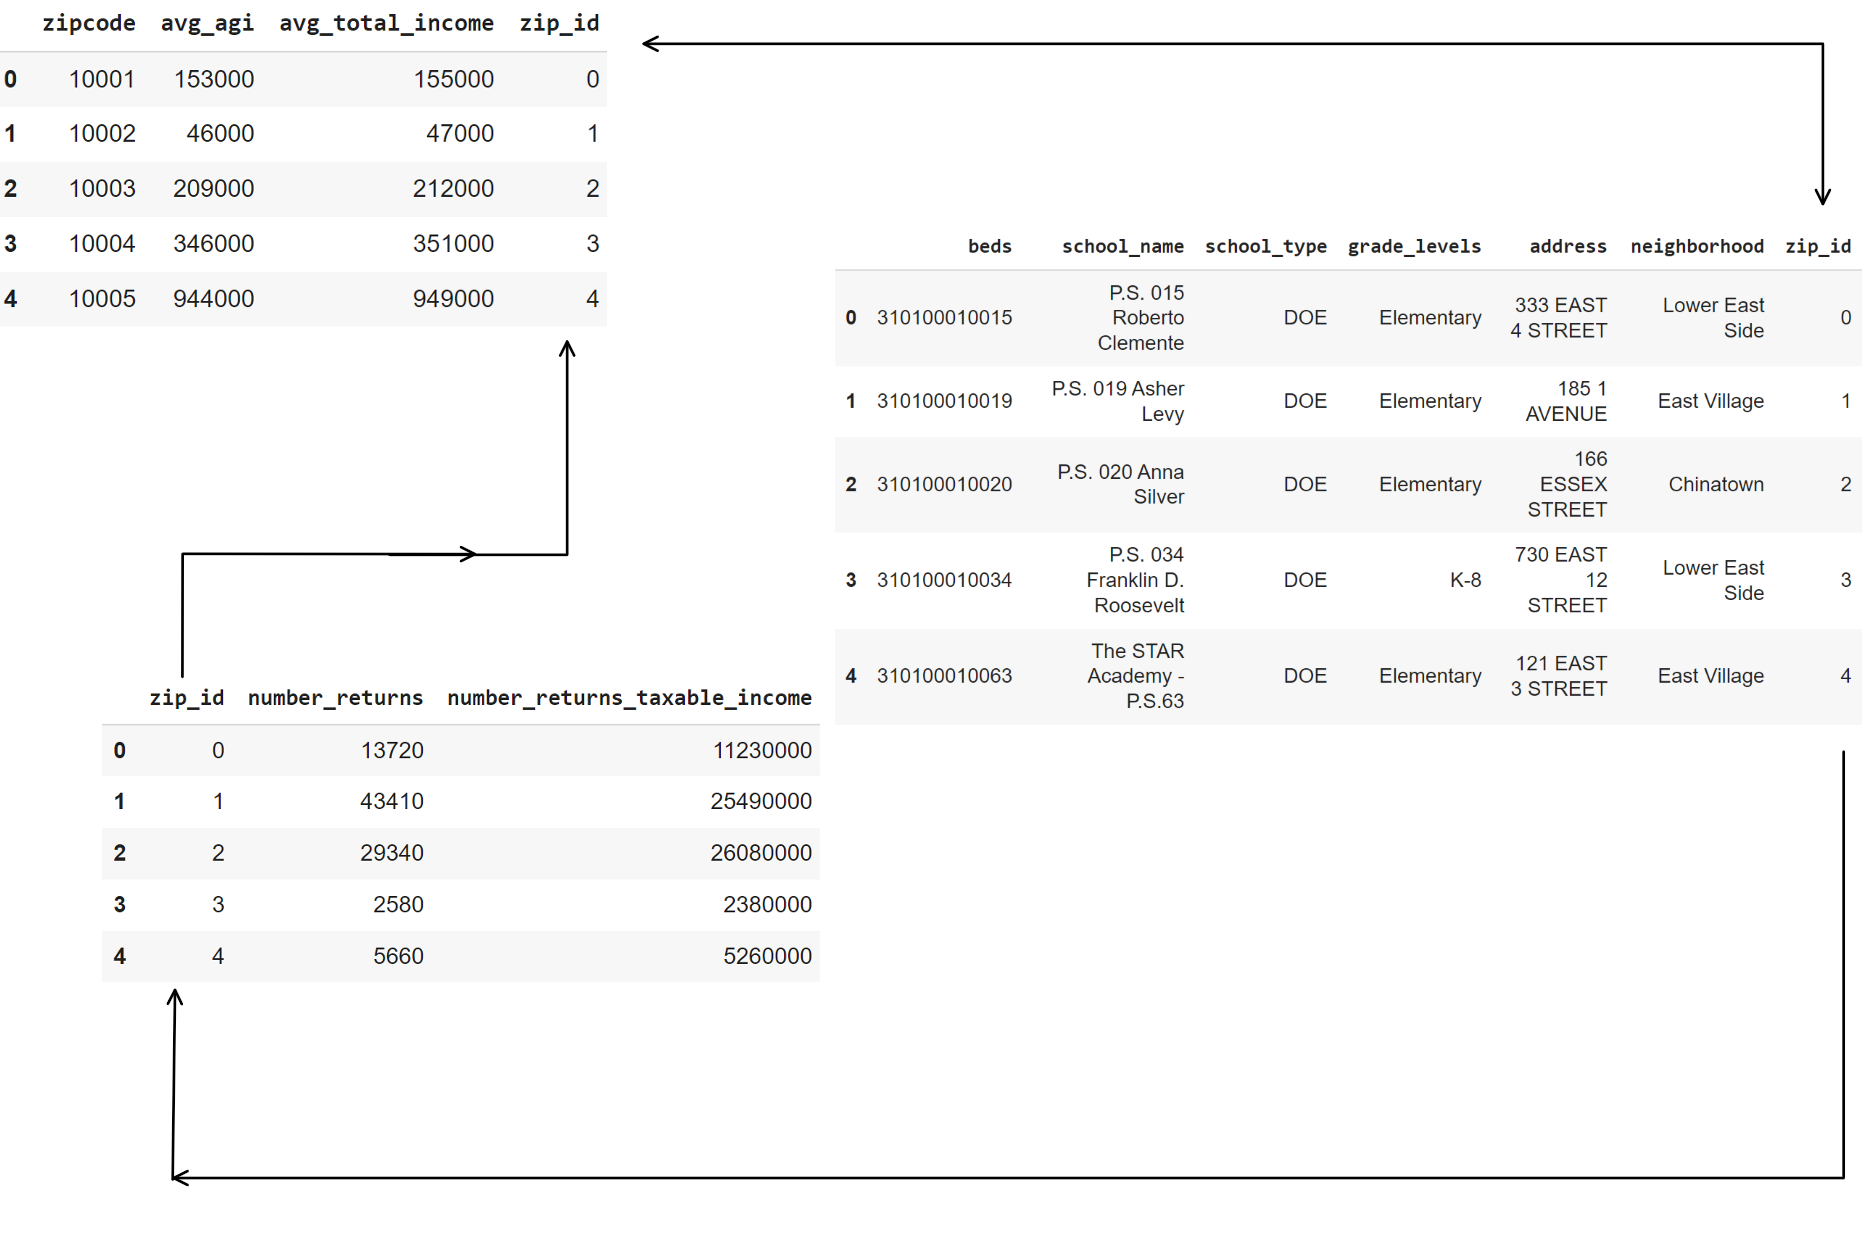